In [1]:
# Esta planilha possui os resultados dos exames dos alunos e nosso objetivo é prever se um aluno passará ou não 
# com base no número de horas dormidas e horas gastas estudando. 
# Temos duas características (horas dormidas, horas estudadas) e duas classes: aprovado (1) e reprovado (0).

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
data = pd.read_csv('Dataset/data_classification.csv', header=None, names=['N1','N2','AP/RE'])
print(data.shape)
data

(100, 3)


,N1,N2,AP/RE
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
5,1.922270,1.331427,0
6,8.978216,0.993438,1
7,6.635603,8.542803,1
8,7.672359,5.416400,1
9,4.866015,2.042671,0


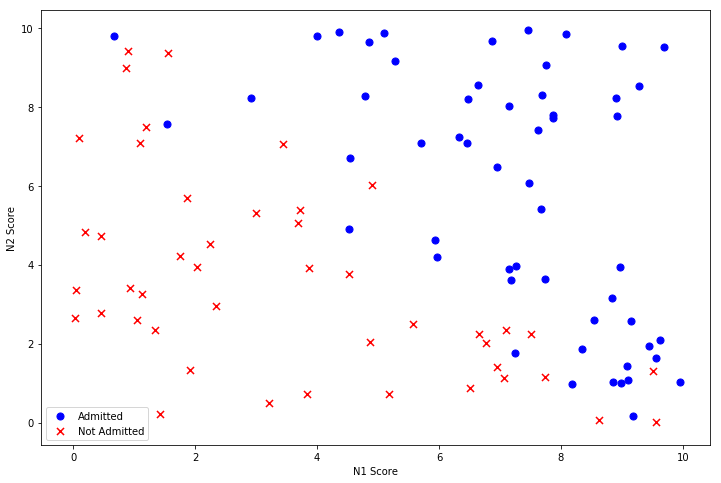

In [3]:
# Dados dos alunos, aprovados e reprovados
positive = data[data['AP/RE'].isin([1])]
negative = data[data['AP/RE'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['N1'], positive['N2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['N1'], negative['N2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('N1 Score')  
ax.set_ylabel('N2 Score')
plt.savefig('data_classification_exercise1')

In [4]:
# Função sigmoid
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [5]:
# Função de custo para avaliar o desempenho do modelo nos dados de treinamento
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [6]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  

In [7]:
# verificar a forma das estruturas de dados
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [8]:
# calcular o custo para a solução final
cost(theta, X, y)

0.6931471805599453

In [9]:
# função que calcule o gradiente dos parâmetros
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [10]:
# otimizar os parâmetros dados 
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y)

0.217007925245645

In [11]:
# função que produzirá previsões para um conjunto de dados X usando nossos parâmetros aprendidos theta.
def predict(theta, X): 
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('Accuracy = {0}%'.format(accuracy))

Accuracy = 89%
